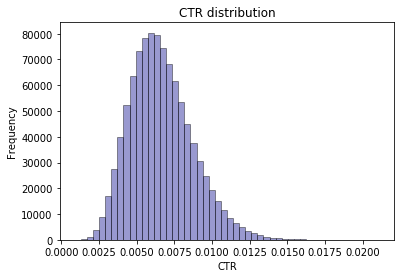

In [5]:
from scipy.stats import uniform
from scipy.stats import binom
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

trials = 100

#Change here1:
###
#display impressions/search queries
#if you use search quearies, remember to add probability of winning auction - it must redice number of queries.
#for example - from 10k to 8k when your ads is shown.
#here we take est. by Google Display Network impressions
volume = 1000000

#CTR

#NO PRIOR DATA
#Lower limit of CTR
#ctr_low = 0

#Higher limit of CTR
#ctr_high = 0.2

#uniform click distribution
#clicks_prob = uniform.rvs(ctr_low, ctr_high, size=volume)

#IF YOU HAVE PRIOR DATA
#in example avg CTR is about 0,6%, interval is from 0.2% to 1%
clicks_prob = np.random.beta(10, 1500, size=volume)

clicks_distr = sns.distplot(clicks_prob, 
                            kde = False,
                            color = 'darkblue',
                            hist_kws={'edgecolor':'black'},)
plt.title('CTR distribution')
plt.xlabel('CTR')
plt.ylabel('Frequency')
plt.show()

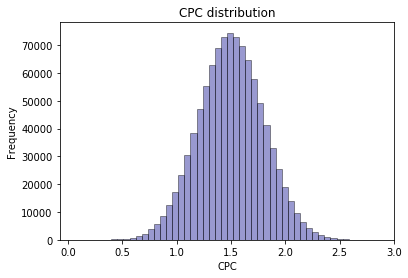

Median CPC is 1.5$


In [6]:
#dollars
cpc_low = 0.1
cpc_high = 2.5

#NO PRIOR DATA
#cpc_prob = uniform.rvs(cpc_low, cpc_high, size = volume)

#IF YOU HAVE PRIOR DATA
#in example avg CPC is about 5$, interval is from 2$ to 7$
# mean and standard deviation
mu, sigma = 1.5, 0.3
cpc_prob = np.random.normal(mu, sigma, size=volume)

cpc_distr = sns.distplot(cpc_prob, 
                          kde = False,  
                          color = 'darkblue',
                          hist_kws={'edgecolor':'black'},)
plt.title('CPC distribution')
plt.xlabel('CPC')
plt.ylabel('Frequency')
plt.show()

cpc_median = round(np.median(cpc_prob), 2)
print('Median CPC is ' + str(cpc_median) + '$')

In [9]:
#You can use this bootstrap function to calculate invervals of mean and use it for more accurate evaluation
#But it'll take time
def bootstrap(array):
    means = []
    x = 0
    for i in array:
        sample = np.random.choice(array, len(array))
        means.append(int(np.mean(sample)))
        print(x)
        x = x+1
    means = np.array(means)
    return means

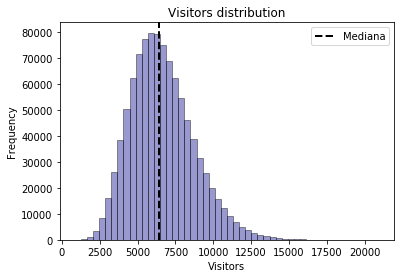

Median total costs - 9610.5$
Max total costs    - 31426.5$
Total costs inverval (95% probability) - 6476.57$ - 12744.43$


In [12]:
#Visitors
visitors = binom.rvs(volume, clicks_prob, size = volume)
#visitors = bootstrap(visitors)
visitors_distr = sns.distplot(visitors, 
                              kde = False, 
                              color = 'darkblue', 
                              hist_kws={'edgecolor':'black'})
plt.title('Visitors distribution')
plt.xlabel('Visitors')
plt.ylabel('Frequency')
plt.axvline(np.median(visitors), label = 'Mediana', color='k', linestyle='dashed', linewidth=2)
plt.legend()
#plt.text(1, 50, 'Median: {:.2f}'.format(np.median(visitors)))
plt.show()

visitors_costs = visitors * cpc_median
visitors_costs_median = round(np.median(visitors_costs), 2)
visitors_costs_max = round(np.max(visitors_costs), 2)
visitors_costs_std = round(np.std(visitors_costs), 2)
print("Median total costs - " + str(round(visitors_costs_median, 2)) + '$')
print("Max total costs " + "   - " + str(round(visitors_costs_max, 2)) + '$')
print("Total costs inverval (95% probability)" + " - " 
      + str(round(visitors_costs_median - visitors_costs_std, 2)) + '$' + ' - ' 
      + str(round(visitors_costs_median + visitors_costs_std, 2)) + '$')

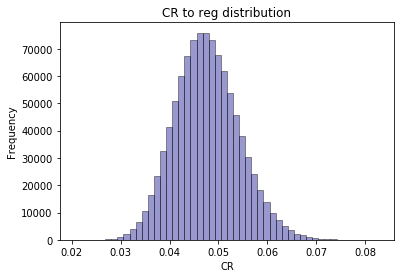

In [13]:
#Registrations
#NO PRIOR DATA
#Lower limit of CR to Reg
#cr_reg_low = 0
#Higher limit of CR to Reg
#cr_reg_high = 0.2
#CR to Registrations
#cr_reg_prob = uniform.rvs(cr_reg_low, cr_reg_high, size=volume)

#IF YOU HAVE PRIOR DATA
#in example avg CR to Registrations is 5%, interval is from 3% to 7%
cr_reg_prob = np.random.beta(50, 1000, size=volume)

cr_reg_distr = sns.distplot(cr_reg_prob,
                            kde = False, 
                            color = 'darkblue', 
                            hist_kws={'edgecolor':'black'})
plt.title('CR to reg distribution')
plt.xlabel('CR')
plt.ylabel('Frequency')
plt.show()

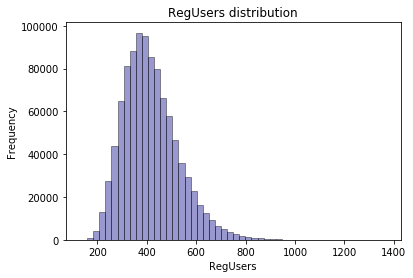

...376 r_users: 0.39% (with costs interval 17.22$ - 33.89$; Medium is 25.56$)
377 r_users: 0.39% (with costs interval 17.18$ - 33.8$; Medium is 25.49$)
378 r_users: 0.38% (with costs interval 17.13$ - 33.72$; Medium is 25.42$)
379 r_users: 0.39% (with costs interval 17.09$ - 33.63$; Medium is 25.36$)
380 r_users: 0.38% (with costs interval 17.04$ - 33.54$; Medium is 25.29$)
381 r_users: 0.38% (with costs interval 17.0$ - 33.45$; Medium is 25.22$)
382 r_users: 0.39% (with costs interval 16.95$ - 33.36$; Medium is 25.16$)
383 r_users: 0.39% (with costs interval 16.91$ - 33.28$; Medium is 25.09$)
...

In [14]:
#registrations
#remember, you can bootstrap it
r_users = binom.rvs(visitors, cr_reg_prob, trials)
r_users_distr = sns.distplot(r_users,
                             kde = False, 
                             color = 'darkblue', 
                             hist_kws={'edgecolor':'black'})
plt.title('RegUsers distribution')
plt.xlabel('RegUsers')
plt.ylabel('Frequency')
plt.show()


r_users_list = r_users.tolist()
r_users_count = set(r_users_list)
for i in r_users_count:
    elements_count = r_users_list.count(i)
    probability = float(elements_count)/float(len(r_users_list))
    if i != 0:
        if i == 1:
            print('Maximum CPL with 95$ probability is ' + str(round((visitors_costs_median + visitors_costs_std)/i, 2))
                  + '$')
            print(str(i) + ' r_users' + ': ' + str(round(probability*100, 2)) + '%' 
                  + ' (with costs interval ' 
                  + str(round((visitors_costs_median - visitors_costs_std)/i, 2)) + '$' + ' - '
                  + str(round((visitors_costs_median + visitors_costs_std)/i, 2)) + '$' 
                  + '; Medium is ' + str(round((visitors_costs_median)/i, 2)) + '$)')
        else:
            print(str(i) + ' r_users' + ': ' + str(round(probability*100, 2)) + '%' 
                  + ' (with costs interval ' 
                  + str(round((visitors_costs_median - visitors_costs_std)/i, 2)) + '$' + ' - '
                  + str(round((visitors_costs_median + visitors_costs_std)/i, 2)) + '$'
                  + '; Medium is ' + str(round((visitors_costs_median)/i, 2)) + '$)')
    else:
        print(str(i) + ' r_users' + ': ' + str(round(probability*100, 2)) + '%')

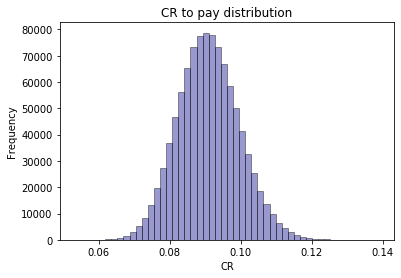

In [17]:
#Payments

#NO PRIOR DATA
#Lower limit of CR to Payment
#cr_pay_low = 0.1
#Higher limit of CR to Payment
#cr_pay_high = 0.2

#cr_pay_prob = uniform.rvs(cr_pay_low, cr_pay_high, size=volume)

#IF YOU HAVE PRIOR DATA
#in example avg CR to Payments is 9%, interval is from 6% to 12%
cr_pay_prob = np.random.beta(100, 1000, size=volume)

cr_pay_distr = sns.distplot(cr_pay_prob,
                            kde = False, 
                            color = 'darkblue', 
                            hist_kws={'edgecolor':'black'})
plt.title('CR to pay distribution')
plt.xlabel('CR')
plt.ylabel('Frequency')
plt.show()

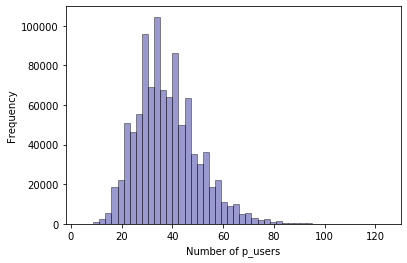

4 p_users: 0.0% (with costs interval 1619.14$ - 3186.11$; Medium is 2402.62$)
5 p_users: 0.0% (with costs interval 1295.31$ - 2548.89$; Medium is 1922.1$)
6 p_users: 0.0% (with costs interval 1079.43$ - 2124.07$; Medium is 1601.75$)
7 p_users: 0.0% (with costs interval 925.22$ - 1820.63$; Medium is 1372.93$)
8 p_users: 0.01% (with costs interval 809.57$ - 1593.05$; Medium is 1201.31$)
9 p_users: 0.02% (with costs interval 719.62$ - 1416.05$; Medium is 1067.83$)
10 p_users: 0.03% (with costs interval 647.66$ - 1274.44$; Medium is 961.05$)
11 p_users: 0.06% (with costs interval 588.78$ - 1158.58$; Medium is 873.68$)
12 p_users: 0.09% (with costs interval 539.71$ - 1062.04$; Medium is 800.88$)
13 p_users: 0.15% (with costs interval 498.2$ - 980.34$; Medium is 739.27$)
14 p_users: 0.24% (with costs interval 462.61$ - 910.32$; Medium is 686.46$)
15 p_users: 0.34% (with costs interval 431.77$ - 849.63$; Medium is 640.7$)
16 p_users: 0.46% (with costs interval 404.79$ - 796.53$; Medium is 600

In [21]:
#payments
#remember, you can bootstrap it
p_users = binom.rvs(r_users, cr_pay_prob)
p_users_distr = sns.distplot(p_users,
                             kde = False, 
                             color = 'darkblue', 
                             hist_kws={'edgecolor':'black'} )
#use it, if number of p_users is really low - 0, 1, 2, 3 on x-label
#plt.xticks(range(np.min(p_users), np.max(p_users) + 1))
plt.ylabel('Frequency')
plt.xlabel('Number of p_users')
plt.show()

p_users_list = p_users.tolist()
p_users_count = set(p_users_list)
for i in p_users_count:
    elements_count = p_users_list.count(i)
    probability = float(elements_count)/float(len(p_users_list))
    if i != 0:
        if i == 1:
            print('Maximum CAC with 95$ probability is ' + str(round((visitors_costs_median + visitors_costs_std)/i, 2))
                  + '$')
            print(str(i) + ' p_users' + ': ' + str(round(probability*100, 2)) + '%' 
                  + ' (with costs interval ' 
                  + str(round((visitors_costs_median - visitors_costs_std)/i, 2)) + '$' + ' - '
                  + str(round((visitors_costs_median + visitors_costs_std)/i, 2)) + '$' 
                  + '; Medium is ' + str(round((visitors_costs_median)/i, 2)) + '$)')
        else:
            print(str(i) + ' p_users' + ': ' + str(round(probability*100, 2)) + '%' 
                  + ' (with costs interval ' 
                  + str(round((visitors_costs_median - visitors_costs_std)/i, 2)) + '$' + ' - '
                  + str(round((visitors_costs_median + visitors_costs_std)/i, 2)) + '$'
                  + '; Medium is ' + str(round((visitors_costs_median)/i, 2)) + '$)')
    else:
        print(str(i) + ' p_users' + ': ' + str(round(probability*100, 2)) + '%')